In [1]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.primitives import Estimator

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
print(qc)


     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘


In [2]:
import qiskit
from qiskit.quantum_info import Pauli
from qiskit.primitives import Estimator

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')
observables = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
estimate = Estimator()

counts = estimate.run([qc] * len(observables), observables)
counts.result()
               


EstimatorResult(values=array([1., 0., 0., 1., 0., 0.]), metadata=[{}, {}, {}, {}, {}, {}])

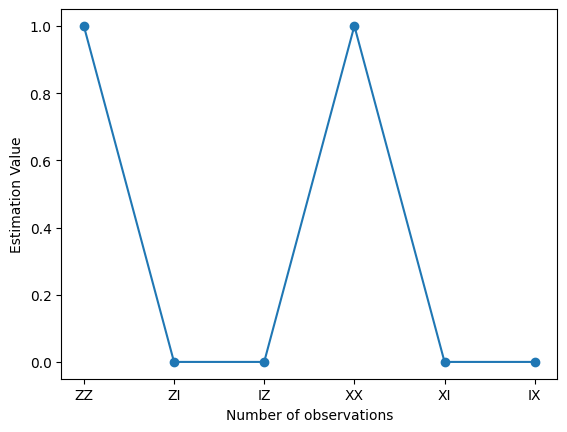

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']

values = counts.result()
plt.plot(data, values, '-o')
plt.xlabel('Number of observations')
plt.ylabel('Estimation Value')
plt.show()
        
#when having two entangled state, it is always at a maximum entangled state meaning the probability of ZZ is 1 
#as in 100% which is the same for XX given that both of them are entangled which can either give |00> or |11> 
#depending on what matrix is used
#however for the single entangled state, we have a probability of 0 because it is at the lowest state
#middle state ZX XZ YZ YX

DRAWING QUANTUM CIRCUIT FOR N QUBITS

In [4]:
def n_circuit_code(n):
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(n - 1):
        qc.cx(i, i + 1)
    return qc

n = 10
solution = n_circuit_code(n)
print(solution)

     ┌───┐                                             
q_0: ┤ H ├──■──────────────────────────────────────────
     └───┘┌─┴─┐                                        
q_1: ─────┤ X ├──■─────────────────────────────────────
          └───┘┌─┴─┐                                   
q_2: ──────────┤ X ├──■────────────────────────────────
               └───┘┌─┴─┐                              
q_3: ───────────────┤ X ├──■───────────────────────────
                    └───┘┌─┴─┐                         
q_4: ────────────────────┤ X ├──■──────────────────────
                         └───┘┌─┴─┐                    
q_5: ─────────────────────────┤ X ├──■─────────────────
                              └───┘┌─┴─┐               
q_6: ──────────────────────────────┤ X ├──■────────────
                                   └───┘┌─┴─┐          
q_7: ───────────────────────────────────┤ X ├──■───────
                                        └───┘┌─┴─┐     
q_8: ────────────────────────────────────────┤ X

estimating the noise as the distance increases from 0 to 1, then 0 to 2 and so on until 0 to n-1

In [8]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.primitives import Estimator

def n_run_qubit(n = 10):
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(n - 1):
        qc.cx(i, i + 1)
    return qc

def estimate_noise(n, distance):
    qc = n_run_qubit(n)
    qc.barrier()
    qc.rz(distance, n - 1)
    return Estimator().run([qc] * 1000, ['Z']).result().get_counts(qc)['1']

distances = np.arange(0, 10)

estimates = [estimate_noise(10, distance) for distance in distances]

print(estimates)


ValueError: The number of circuits (1000) does not match the number of observables (1).

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService



ModuleNotFoundError: No module named 'qiskit_ibm_runtime'